In [1]:
import os
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
classDict = {'negative': 0, 'positive': 1,'neutral': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "restaurant_data.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
    print('File read completed')    
    return sentences, labels

In [3]:
sentences, labels = read_File()

File read completed


In [4]:
import pandas as pd

data = {'labels': labels,
        'comments': sentences
        }

df = pd.DataFrame(data, columns = ['labels', 'comments'])
map = {'pos': 'positive', 'neg': 'negative', 'ntr': 'neutral'}
df['labels'] = df['labels'].replace(map)
df = df.rename(columns = {'labels':'sentiment'})
df = df[['comments','sentiment']]
df.head()

,comments,sentiment
0,"negative স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।\n",negative
1,"positive শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,...",positive
2,"positive খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষ...",positive
3,positive যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভে...,positive
4,"positive একবার গিয়ে এটি উপভোগ করবেন না, আমি বল...",positive


In [5]:
print("Total Reviews:",len(df),
      "\nTotal Positive Reviews:",len(df[df.sentiment=='positive']),
      "\nTotal Negative Reviews:",len(df[df.sentiment=='negative']),
      "\nTotal Neutral Reviews:",len(df[df.sentiment=='neutral']))

Total Reviews: 1608 
Total Positive Reviews: 978 
Total Negative Reviews: 400 
Total Neutral Reviews: 230


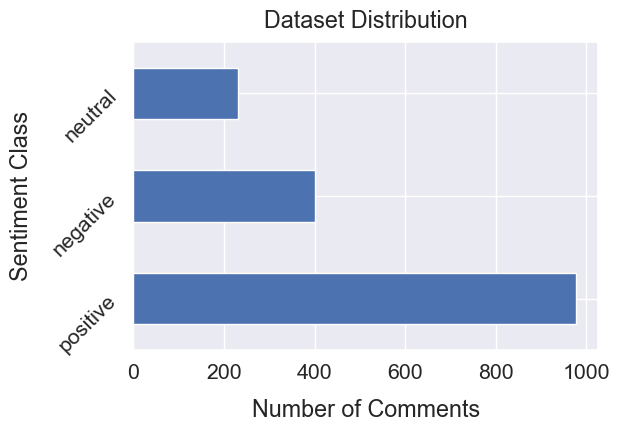

In [6]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.ylabel("Sentiment Class", labelpad=12)
plt.xlabel("Number of Comments", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [7]:
# print some unprocessed reviews
sample_data = [0,2,95,115,308,4,1050,900,591]
for i in sample_data:
      print(df.comments[i],'\n','Sentiment:-- ',df.sentiment[i],'\n')  

negative স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।
 
 Sentiment:--  negative 

positive খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘর যা গর্বের সঙ্গে আপনি খাওয়া মত মনে আপ চাবুক যা কিনা মেনুতে বা না।
 
 Sentiment:--  positive 

positive আমার আন্তরিকভাবে সুপারিশ।
 
 Sentiment:--  positive 

negative আমি নেতিবাচক  স্বাদ কুঁড়ি প্রভাবিত, বাম এবং ডান থেকে আসছে শক্তিশালী scents  ।
 
 Sentiment:--  negative 

positive গিগিনো খুব উপভোগ্য ওয়াগনার পার্কের ।
 
 Sentiment:--  positive 

positive একবার গিয়ে এটি উপভোগ করবেন না, আমি বলতে পারেন যে তারা সব পবে না।
 
 Sentiment:--  positive 

negative তাই আমার স্বামী একটি অজুহাত তৈরি করে আমাকে ছেড়ে যেতে পারেন
 
 Sentiment:--  negative 

neutral অন্যান্য ক্ষুধা উদ্রেককর বস্তু এবং খাদ্য
 
 Sentiment:--  neutral 

positive YUKA ভালবাসা 
 
 Sentiment:--  positive 



In [8]:
# Data cleaning function
def clean_sentence(sent):
    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent) 
    sent = re.sub('[^\u0980-\u09FF]',' ',str(sent))
    sent = sent.strip()
    return sent
# Apply the function into the dataframe
for i, sent  in enumerate(df['comments'].tolist()):
    df.loc[i,'clean_comments'] = clean_sentence(sent)

In [9]:
# print some cleaned reviews from the dataset
sample_data = [0,2,95,115,308,4,1050,900,591]
for i in sample_data:
     print('Original:\n',df.comments[i],'\nCleaned:\n',
           df.clean_comments[i],'\n','Sentiment:-- ',df.sentiment[i],'\n')

Original:
 negative স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।
 
Cleaned:
 স্টাফ কিন্তু আমাদের জন্য ভয়ঙ্কর ছিল 
 Sentiment:--  negative 

Original:
 positive খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘর যা গর্বের সঙ্গে আপনি খাওয়া মত মনে আপ চাবুক যা কিনা মেনুতে বা না।
 
Cleaned:
 খাবার একদমই ব্যতিক্রমী একটি খুব সক্ষম রান্নাঘর যা গর্বের সঙ্গে আপনি খাওয়া মত মনে আপ চাবুক যা কিনা মেনুতে বা না 
 Sentiment:--  positive 

Original:
 positive আমার আন্তরিকভাবে সুপারিশ।
 
Cleaned:
 আমার আন্তরিকভাবে সুপারিশ 
 Sentiment:--  positive 

Original:
 negative আমি নেতিবাচক  স্বাদ কুঁড়ি প্রভাবিত, বাম এবং ডান থেকে আসছে শক্তিশালী scents  ।
 
Cleaned:
 আমি নেতিবাচক স্বাদ কুঁড়ি প্রভাবিত বাম এবং ডান থেকে আসছে শক্তিশালী 
 Sentiment:--  negative 

Original:
 positive গিগিনো খুব উপভোগ্য ওয়াগনার পার্কের ।
 
Cleaned:
 গিগিনো খুব উপভোগ্য ওয়াগনার পার্কের 
 Sentiment:--  positive 

Original:
 positive একবার গিয়ে এটি উপভোগ করবেন না, আমি বলতে পারেন যে তারা সব পবে না।
 
Cleaned:
 একবার গিয়ে এটি উপভোগ করবেন না আমি বলত

In [10]:
df = df[['clean_comments','sentiment']]
df.head()

,clean_comments,sentiment
0,স্টাফ কিন্তু আমাদের জন্য ভয়ঙ্কর ছিল,negative
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,positive
2,খাবার একদমই ব্যতিক্রমী একটি খুব সক্ষম রান্নাঘর...,positive
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive
4,একবার গিয়ে এটি উপভোগ করবেন না আমি বলতে পারেন য...,positive


In [11]:
# Length of each Reveiws
df2 = df[['clean_comments','sentiment']]
df2['length'] = df2['clean_comments'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = df2.loc[df2.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(df2)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 52 Small Reviews 
Total Reviews: 1556


In [12]:
print("Total Reviews:",len(dataset),
      "\nTotal Positive Reviews:",len(dataset[dataset.sentiment=='positive']),
      "\nTotal Negative Reviews:",len(dataset[dataset.sentiment=='negative']),
      "\nTotal Neutral Reviews:",len(dataset[dataset.sentiment=='neutral']))

Total Reviews: 1556 
Total Positive Reviews: 942 
Total Negative Reviews: 393 
Total Neutral Reviews: 221


In [13]:
df = dataset[['clean_comments','sentiment']]
df

,clean_comments,sentiment
0,স্টাফ কিন্তু আমাদের জন্য ভয়ঙ্কর ছিল,negative
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,positive
2,খাবার একদমই ব্যতিক্রমী একটি খুব সক্ষম রান্নাঘর...,positive
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive
4,একবার গিয়ে এটি উপভোগ করবেন না আমি বলতে পারেন য...,positive
...,...,...
1551,হতাশ নাই আমরা,positive
1552,আমি খাদ্য পর প্রিভিউ রিভিউ কিছু পড়া পড়েছি মান...,neutral
1553,তাই এটি এখন একটি খুব আকর্ষণীয় স্থান সম্প্রতি ...,positive
1554,একটি অ্যাভাইজার এবং ড্রিংক টি ফাইলের জন্য টি পক্ষ,neutral


In [14]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.clean_comments) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].clean_comments) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.sentiment==label].clean_comments)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.sentiment==label].clean_comments))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)  


Class Name :  positive
Number of Documents:942
Number of Words:10329
Number of Unique Words:2853
Most Frequent Words:

এবং	416
একটি	275
আমি	201
ছিল	200
ভাল	164
জন্য	158
এটি	120
আমার	106
এই	104
আপনি	102

Class Name :  negative
Number of Documents:393
Number of Words:4805
Number of Unique Words:1655
Most Frequent Words:

এবং	135
ছিল	129
না	98
একটি	83
আমি	82
জন্য	77
আমরা	68
এটি	60
আমাদের	54
এই	44

Class Name :  neutral
Number of Documents:221
Number of Words:2264
Number of Unique Words:1020
Most Frequent Words:

আমি	85
এবং	50
একটি	41
জন্য	37
আমার	36
আমরা	35
না	30
এই	28
এটি	20
আপনি	18
Total Number of Unique Words:4059


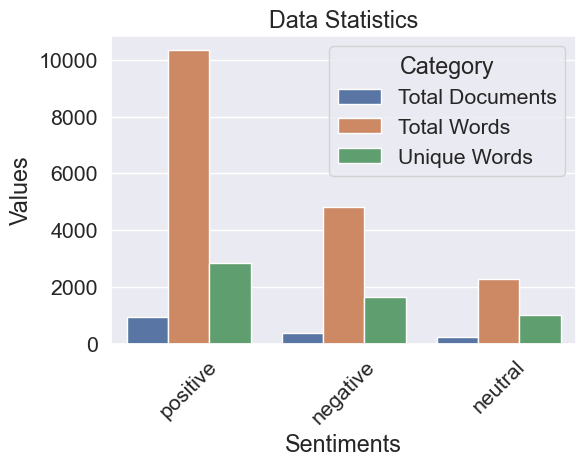

In [15]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df2 = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df2,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Sentiments') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [16]:
df.head()

,clean_comments,sentiment
0,স্টাফ কিন্তু আমাদের জন্য ভয়ঙ্কর ছিল,negative
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,positive
2,খাবার একদমই ব্যতিক্রমী একটি খুব সক্ষম রান্নাঘর...,positive
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive
4,একবার গিয়ে এটি উপভোগ করবেন না আমি বলতে পারেন য...,positive


In [17]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [18]:
stop_words = {'অবশ্য', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আরও', 'আর', 'আগে', 'আগেই', 'আই', 'অতএব', 'আগামী', 'অবধি', 'অনুযায়ী', 'আদ্যভাগে', 'এই', 'একই', 'একে', 'একটি', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস', 'এত', 'এতে', 'এসে', 'একে', 'এ', 'ঐ', ' ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক', 'কয়েকটি', 'করবে', 'করলেন', 'করার', 'কারও', 'করা', 'করি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে', 'করেন', 'করবেন', 'করায়', 'করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'কারণ', 'কিছু', 'কিছুই', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কেউ', 'কেউই', 'কাউকে', 'কেন', 'কে', 'কোনও', 'কোনো', 'কোন', 'কখনও', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'চলে', 'ছাড়া', 'ছাড়াও', 'ছিলেন', 'ছিল', 'জন্য', 'জানা', 'ঠিক', 'তিনি', 'তিনঐ', 'তিনিও', 'তখন', 'তবে', 'তবু', 'তাঁদের', 'তাঁহারা', 'তাঁরা', 'তাঁর', 'তাঁকে', 'তাই', 'তেমন', 'তাকে', 'তাহা', 'তাহাতে', 'তাহার', 'তাদের', 'তারপর', 'তারা', 'তারৈ', 'তার', 'তাহলে', 'তিনি', 'তা', 'তাও', 'তাতে', 'তো', 'তত', 'তুমি', 'তোমার', 'তথা', 'থাকে', 'থাকা', 'থাকায়', 'থেকে', 'থেকেও', 'থাকবে', 'থাকেন', 'থাকবেন', 'থেকেই', 'দিকে', 'দিতে', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 'দিলেন', 'দু', 'দুটি', 'দুটো', 'দেয়', 'দেওয়া', 'দেওয়ার', 'দেখা', 'দেখে', 'দেখতে', 'দ্বারা', 'ধরে', 'ধরা', 'নয়', 'নানা', 'না', 'নাকি', 'নাগাদ', 'নিতে', 'নিজে', 'নিজেই', 'নিজের', 'নিজেদের', 'নিয়ে', 'নেওয়া', 'নেওয়ার', 'নেই', 'নাই', 'পক্ষে', 'পর্যন্ত', 'পাওয়া', 'পারেন', 'পারি', 'পারে', 'পরে', 'পরেই', 'পরেও', 'পর', 'পেয়ে', 'প্রতি', 'প্রভৃতি', 'প্রায়', 'ফের', 'ফলে', 'ফিরে', 'ব্যবহার', 'বলতে', 'বললেন', 'বলেছেন', 'বলল', 'বলা', 'বলেন', 'বলে', 'বহু', 'বসে', 'বার', 'বা', 'বিনা', 'বরং', 'বদলে', 'বাদে', 'বার', 'বিশেষ', 'বিভিন্ন', 'ব্যবহার', 'ব্যাপারে', 'ভাবে', 'ভাবেই', 'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মধ্যভাগে', 'মাধ্যমে', 'মাত্র', 'মতো', 'মতোই', 'মোটেই', 'যখন', 'যদি', 'যদিও', 'যাবে', 'যায়', 'যাকে', 'যাওয়া', 'যাওয়ার', 'যত', 'যতটা', 'যা', 'যার', 'যারা', 'যাঁর', 'যাঁরা', 'যাদের', 'যান', 'যাচ্ছে', 'যেতে', 'যাতে', 'যেন', 'যেমন', 'যেখানে', 'যিনি', 'যে', 'রেখে', 'রাখা', 'রয়েছে', 'রকম', 'শুধু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সব', 'সবার', 'সহ', 'সুতরাং', 'সহিত', 'সেই', 'সেটা', 'সেটি', 'সেটাই', 'সেটাও', 'সম্প্রতি', 'সেখান', 'সেখানে', 'সে', 'স্পষ্ট', 'স্বয়ং', 'হইতে', 'হইবে', 'হৈলে', 'হইয়া', 'হচ্ছে', 'হত', 'হতে', 'হতেই', 'হবে', 'হবেন', 'হয়েছিল', 'হয়েছে', 'হয়েছেন', 'হয়ে', 'হয়নি', 'হয়', 'হয়েই', 'হয়তো', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হিসাবে', 'হওয়া', 'হওয়ার', 'হওয়ায়', 'হন', 'হোক', 'জন', 'জনকে', 'জনের', 'জানতে', 'জানায়', 'জানিয়ে', 'জানানো', 'জানিয়েছে', 'জন্য', 'জন্যওজে', 'জে', 'বেশ', 'দেন', 'তুলে', 'ছিলেন', 'চান', 'চায়', 'চেয়ে', 'মোট', 'যথেষ্ট', 'টি', 'এ', 'হয়','কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা', 'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়', 'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন', 'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার', 'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',  'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর', 'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',  'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের', 'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি', 'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য', 'আদ্যভাগে এই'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [19]:
test = df.loc[15,'clean_comments']
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : আমি অবশ্যই মরিয়মের সুপারিশ করব এবং এটি আমার নিয়মিত প্রতিবেশী হান্টগুলির মধ্যে একটি
after : অবশ্যই মরিয়মের সুপারিশ করব নিয়মিত প্রতিবেশী হান্টগুলির


In [20]:
df['updated_cleaned_sentences'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_comments'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_cleaned_sentences.csv', encoding='utf-8', index=False)

In [21]:
df.head()

,clean_comments,sentiment,updated_cleaned_sentences
0,স্টাফ কিন্তু আমাদের জন্য ভয়ঙ্কর ছিল,negative,স্টাফ ভয়ঙ্কর
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,positive,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...
2,খাবার একদমই ব্যতিক্রমী একটি খুব সক্ষম রান্নাঘর...,positive,খাবার একদমই ব্যতিক্রমী সক্ষম রান্নাঘর গর্বের খ...
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive,গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানায় আপনা...
4,একবার গিয়ে এটি উপভোগ করবেন না আমি বলতে পারেন য...,positive,উপভোগ পবে


In [22]:
df = df[['updated_cleaned_sentences','sentiment']]
df.head()

,updated_cleaned_sentences,sentiment
0,স্টাফ ভয়ঙ্কর,negative
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,positive
2,খাবার একদমই ব্যতিক্রমী সক্ষম রান্নাঘর গর্বের খ...,positive
3,গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানায় আপনা...,positive
4,উপভোগ পবে,positive


In [23]:
# Create a new column 'new_column' based on the condition
df['positive'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df['negative'] = df['sentiment'].apply(lambda x: 1 if x == 'negative' else 0)
df['neutral'] = df['sentiment'].apply(lambda x: 1 if x == 'neutral' else 0)

In [24]:
df.head()

,updated_cleaned_sentences,sentiment,positive,negative,neutral
0,স্টাফ ভয়ঙ্কর,negative,0,1,0
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,positive,1,0,0
2,খাবার একদমই ব্যতিক্রমী সক্ষম রান্নাঘর গর্বের খ...,positive,1,0,0
3,গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানায় আপনা...,positive,1,0,0
4,উপভোগ পবে,positive,1,0,0


In [25]:
df = df[['updated_cleaned_sentences','positive', 'negative', 'neutral']]
df

,updated_cleaned_sentences,positive,negative,neutral
0,স্টাফ ভয়ঙ্কর,0,1,0
1,শুধুমাত্ররিডামিং ফ্যাক্টর খাদ্য ছিলপুরোপুরি ন্...,1,0,0
2,খাবার একদমই ব্যতিক্রমী সক্ষম রান্নাঘর গর্বের খ...,1,0,0
3,গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানায় আপনা...,1,0,0
4,উপভোগ পবে,1,0,0
...,...,...,...,...
1551,হতাশ,1,0,0
1552,খাদ্য প্রিভিউ রিভিউ পড়া পড়েছি মানুষ নিউ ইয়র্...,0,0,1
1553,আকর্ষণীয় স্থান,1,0,0
1554,অ্যাভাইজার ড্রিংক ফাইলের পক্ষ,0,0,1


In [26]:
print("Total Reviews:",len(df),
      "\nTotal Positive Reviews:",len(df[df.positive==1]),
      "\nTotal Negative Reviews:",len(df[df.negative==1]),
      "\nTotal Neutral Reviews:",len(df[df.neutral==1]))

Total Reviews: 1556 
Total Positive Reviews: 942 
Total Negative Reviews: 393 
Total Neutral Reviews: 221


In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
comment_texts = df['updated_cleaned_sentences']
target_labels = df[['positive', 'negative', 'neutral']]

X_train, X_test, y_train, y_test = train_test_split(comment_texts, target_labels, test_size=0.2, random_state=42)

In [29]:
print("Size of Xtrain", X_train.shape)
print("Size of Ytrain", y_train.shape)
print("Size of Xtest", X_test.shape)
print("Size of Xtest", y_test.shape)

Size of Xtrain (1244,)
Size of Ytrain (1244, 3)
Size of Xtest (312,)
Size of Xtest (312, 3)


In [30]:
X_train.tail(5)

1130    খাদ্যটি বেশিরভাগই আঁচড়ের দাগ তৈরি তাজা ভালই স...
1294         নতুন প্রতিবেশীর অন্বেষণ মহান র হোঁচট খেয়েছি
860     শেষ রাতের স্পাইস গ্রিল একমাত্র জায়গা ভারতীয় ...
1459                                          খাঁটি খাদ্য
1126             এন্টারপ্রাইওয়ার সমঝোতা আধুনিক আরামদায়ক
Name: updated_cleaned_sentences, dtype: object

In [31]:
from gensim.models import FastText
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [32]:
import time

In [33]:
%%time

start = time.time()

w2v_model = FastText()
w2v_model.build_vocab(corpus_iterable=X_train)

w2v_model.train(corpus_iterable=X_train, total_examples=w2v_model.corpus_count, total_words=w2v_model.corpus_total_words, epochs=5)
end = time.time()

print("The training took", end-start, "seconds")

The training took 1.043764352798462 seconds
CPU times: total: 1.12 s
Wall time: 1.04 s


In [34]:
X_train.head()

782     প্রবেশ মালিক স্টিভেন ফ্রেডেরিককে স্বাগত জানাই ...
1236                              একজন কঠিন রিদয় প্রেমিকা
772                   সন্ধ্যায় প্রলুব্ধ চিন্তায় এক মত হব
1300    তিনবার মদের দোকানে অডার করেছি একবারও মেনুর আই...
383                           চিকেন টিক্কা নান ডালস পছন্দ
Name: updated_cleaned_sentences, dtype: object

In [35]:
def get_embedding(model, comment):
    words = comment.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return sum(embeddings) / len(embeddings)
    else:
        return []
    
X_train_word_emb = X_train.apply(lambda comment: get_embedding(w2v_model,comment)).tolist()
X_train_word_emb = pd.DataFrame(X_train_word_emb)

X_test_word_emb = X_test.apply(lambda comment: get_embedding(w2v_model, comment)).tolist()
X_test_word_emb = pd.DataFrame(X_test_word_emb)

In [36]:
X_test_word_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.000829,-0.000786,0.002109,0.000677,-0.001393,-0.000254,0.000830,0.000017,-0.000215,0.000559,...,0.001098,0.000196,0.000313,0.000091,0.000255,0.001381,0.000023,-0.001420,0.001732,-0.000366
1,-0.004578,0.008398,0.003916,0.006461,0.003820,-0.018253,0.000206,-0.000328,-0.013185,-0.014331,...,0.020729,0.005101,0.011408,-0.020184,0.012157,0.018409,0.006220,-0.007722,-0.012533,-0.003524
2,0.000545,0.000991,0.000319,0.000350,0.000152,0.000941,0.001049,-0.001742,0.000343,-0.000832,...,0.000269,0.000259,0.000348,-0.000032,0.001014,0.000014,-0.000152,0.000960,-0.001505,0.000233
3,-0.001519,-0.000374,-0.000483,0.000878,0.000667,-0.000819,0.000911,-0.001816,-0.000359,0.000890,...,-0.000429,-0.000161,-0.000192,-0.000571,-0.000966,-0.001272,0.000560,-0.000060,-0.000016,-0.000456
4,0.000086,-0.000883,-0.000543,-0.000161,-0.000316,0.000927,-0.000766,-0.000298,-0.000007,-0.000011,...,0.000290,0.000730,0.000260,0.000044,-0.000391,-0.000919,0.000309,-0.000118,0.000217,-0.000206


In [37]:
d2v_train_data = [comment for comment in X_train]

def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield TaggedDocument(list_of_words, [i])
        
tagged_document = list(create_tagged_document(d2v_train_data))

In [38]:
tart = time.time()

d2v_model = Doc2Vec(vector_size=200, min_count=1, epochs=5)
d2v_model.build_vocab(tagged_document)

d2v_model.train(tagged_document, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

end = time.time()

print("The training took", end-start, "seconds")

The training took 2.102977752685547 seconds


In [39]:
X_train_doc_emb = X_train.apply(lambda comment: d2v_model.infer_vector(comment.split())).tolist()
X_train_doc_emb = pd.DataFrame(X_train_doc_emb)

X_test_doc_emb = X_test.apply(lambda comment: d2v_model.infer_vector(comment.split())).tolist()
X_test_doc_emb = pd.DataFrame(X_test_doc_emb)

In [40]:
X_train_word_emb.fillna(0, inplace=True)
X_test_word_emb.fillna(0, inplace=True)

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from wordcloud import WordCloud
import requests
from PIL import Image
from io import BytesIO

import re
import spacy
from gensim.models import FastText
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import os

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [43]:
from tqdm import tqdm
word_models1 = []
doc_models2 = []
word_models3 = []
doc_models4 = []
word_models5 = []
doc_models6 = []
word_models7 = []
doc_models8 = []
word_models9 = []
doc_models10 = []

print("TRAINING LogisticRegression on FastText features")

for i in tqdm(range(3)):
    model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
    model.fit(X_train_word_emb, y_train.iloc[:, i])
    word_models1.append(model)
   
print("TRAINING LogisticRegression on Doc2Vec features")

for i in tqdm(range(3)):
    model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)   
    model.fit(X_train_doc_emb, y_train.iloc[:, i])
    doc_models2.append(model)
    

""" *****************DecisionTreeClassifier******************* """

print("TRAINING DecisionTreeClassifier on FastText features")

for i in tqdm(range(3)):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    model.fit(X_train_word_emb, y_train.iloc[:, i])
    word_models3.append(model)
   
print("TRAINING DecisionTreeClassifier on Doc2Vec features")

for i in tqdm(range(3)):
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)  
    model.fit(X_train_doc_emb, y_train.iloc[:, i])
    doc_models4.append(model)
    
""" *****************RandomForestClassifier******************* """
word_models_rf = []
doc_models_rf = []

print("TRAINING RandomForestClassifier on FastText features")

for i in tqdm(range(3)):
    model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    model.fit(X_train_word_emb, y_train.iloc[:, i])
    word_models5.append(model)
   
print("TRAINING RandomForestClassifier on Doc2Vec features")

for i in tqdm(range(3)):
    model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0) 
    model.fit(X_train_doc_emb, y_train.iloc[:, i])
    doc_models6.append(model)
    
print("TRAINING KNeighbors Classifier on FastText features")

for i in tqdm(range(3)):
    model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    model.fit(X_train_word_emb, y_train.iloc[:, i])
    word_models7.append(model)
   
print("TRAINING KNeighbors Classifier on Doc2Vec features")

for i in tqdm(range(3)):
    model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    model.fit(X_train_doc_emb, y_train.iloc[:, i])
    doc_models8.append(model)
    
print("TRAINING SGDClassifier on FastText features")

for i in tqdm(range(3)):
    model = SGDClassifier(loss="log", penalty="l2") 
    model.fit(X_train_word_emb, y_train.iloc[:, i])
    word_models9.append(model)
   
print("TRAINING SGDClassifier Classifier on Doc2Vec features")

for i in tqdm(range(3)):
    model = SGDClassifier(loss="log", penalty="l2")
    model.fit(X_train_doc_emb, y_train.iloc[:, i])
    doc_models10.append(model)

TRAINING LogisticRegression on FastText features


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 142.61it/s]


TRAINING LogisticRegression on Doc2Vec features


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 65.29it/s]


TRAINING DecisionTreeClassifier on FastText features


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.76it/s]


TRAINING DecisionTreeClassifier on Doc2Vec features


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.14it/s]


TRAINING RandomForestClassifier on FastText features


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.99s/it]


TRAINING RandomForestClassifier on Doc2Vec features


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.95s/it]


TRAINING KNeighbors Classifier on FastText features


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 288.08it/s]


TRAINING KNeighbors Classifier on Doc2Vec features


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 267.77it/s]


TRAINING SGDClassifier on FastText features


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 54.70it/s]


TRAINING SGDClassifier Classifier on Doc2Vec features


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 34.11it/s]


In [44]:
cols = ['positive', 'negative', 'neutral']

print()
print('""" *****************Logistic Regression******************* """')
print()

predictions_word = []
predictions_doc = []

f1_scores_w = []
f1_scores_d = []

for i in range(3):
    model = word_models1[i]
    predictions = model.predict(X_test_word_emb)
    predictions_word.append(predictions)
    
for i in range(3):
    model = doc_models2[i]
    predictions = model.predict(X_test_doc_emb)
    predictions_doc.append(predictions)
    
for i, col in enumerate(cols):
    f1_score_w = f1_score(y_test.iloc[:, i], predictions_word[i], average='micro')
    f1_scores_w.append(f1_score_w)   
    f1_score_d = f1_score(y_test.iloc[:, i], predictions_doc[i], average='micro')
    f1_scores_d.append(f1_score_d)
    
    print("F1 score for", col, "with FastText", f1_score_w)
    print("F1 score for", col, "with Doc2Vec", f1_score_d)
    print()    
print("AVG F1 SCORE FastText:", np.mean(f1_scores_w))
print("AVG F1 SCORE Doc2Vec:", np.mean(f1_scores_d))


print()
print('""" *****************Decision Tree Classifier******************* """')
print()


predictions_word_d = []
predictions_doc_d = []

f1_scores_w_d = []
f1_scores_d_d = []

for i in range(3):
    model = word_models3[i]
    predictions = model.predict(X_test_word_emb)
    predictions_word_d.append(predictions)
    
for i in range(3):
    model = doc_models4[i]
    predictions = model.predict(X_test_doc_emb)
    predictions_doc_d.append(predictions)
    
for i, col in enumerate(cols):
    f1_score_w_d = f1_score(y_test.iloc[:, i], predictions_word_d[i], average='micro')
    f1_scores_w_d.append(f1_score_w_d)
    f1_score_d_d = f1_score(y_test.iloc[:, i], predictions_doc_d[i], average='micro')
    f1_scores_d_d.append(f1_score_d_d)
    print("F1 score for", col, "with FastText", f1_score_w_d)
    print("F1 score for", col, "with Doc2Vec", f1_score_d_d)
    print()
    
print("AVG F1 SCORE FastText:", np.mean(f1_scores_w_d))
print("AVG F1 SCORE Doc2Vec:", np.mean(f1_scores_d_d))

print()
print('""" *****************Random Forest Classifier******************* """')
print()

predictions_word_rf = []
predictions_doc_rf = []

f1_scores_w_rf = []
f1_scores_d_rf = []

for i in range(3):
    model = word_models5[i]
    predictions = model.predict(X_test_word_emb)
    predictions_word_rf.append(predictions)
    
for i in range(3):
    model = doc_models6[i]
    predictions = model.predict(X_test_doc_emb)
    predictions_doc_rf.append(predictions)
    
for i, col in enumerate(cols):
    f1_score_w_rf = f1_score(y_test.iloc[:, i], predictions_word_rf[i], average='micro')
    f1_scores_w_rf.append(f1_score_w_rf)
    f1_score_d_rf = f1_score(y_test.iloc[:, i], predictions_doc_rf[i], average='micro')
    f1_scores_d_rf.append(f1_score_d_rf)
    print("F1 score for", col, "with FastText", f1_score_w_rf)
    print("F1 score for", col, "with Doc2Vec", f1_score_d_rf)
    print()
    
print("AVG F1 SCORE FastText:", np.mean(f1_scores_w_rf))
print("AVG F1 SCORE Doc2Vec:", np.mean(f1_scores_d_rf))


print()
print('""" *****************KNeighbors Classifier******************* """')
print()

predictions_word_kc = []
predictions_doc_kc = []

f1_scores_w_kc = []
f1_scores_d_kc = []

for i in range(3):
    model = word_models7[i]
    predictions = model.predict(X_test_word_emb)
    predictions_word_kc.append(predictions)
    
for i in range(3):
    model = doc_models8[i]
    predictions = model.predict(X_test_doc_emb)
    predictions_doc_kc.append(predictions)
    
for i, col in enumerate(cols):
    f1_score_w_kc = f1_score(y_test.iloc[:, i], predictions_word_kc[i], average='micro')
    f1_scores_w_kc.append(f1_score_w_kc)
    f1_score_d_kc = f1_score(y_test.iloc[:, i], predictions_doc_kc[i], average='micro')
    f1_scores_d_kc.append(f1_score_d_kc)
    print("F1 score for", col, "with FastText", f1_score_w_kc)
    print("F1 score for", col, "with Doc2Vec", f1_score_d_kc)
    print()
    
print("AVG F1 SCORE FastText:", np.mean(f1_scores_w_kc))
print("AVG F1 SCORE Doc2Vec:", np.mean(f1_scores_d_kc))

print()
print('""" *****************SGDClassifier******************* """')
print()

predictions_word_sv = []
predictions_doc_sv = []

f1_scores_w_sv = []
f1_scores_d_sv = []

for i in range(3):
    model = word_models9[i]
    predictions = model.predict(X_test_word_emb)
    predictions_word_sv.append(predictions)
    
for i in range(3):
    model = doc_models10[i]
    predictions = model.predict(X_test_doc_emb)
    predictions_doc_sv.append(predictions)
    
for i, col in enumerate(cols):
    f1_score_w_sv = f1_score(y_test.iloc[:, i], predictions_word_sv[i], average='micro')
    f1_scores_w_sv.append(f1_score_w_sv)
    f1_score_d_sv = f1_score(y_test.iloc[:, i], predictions_doc_sv[i], average='micro')
    f1_scores_d_sv.append(f1_score_d_sv)
    print("F1 score for", col, "with FastText", f1_score_w_sv)
    print("F1 score for", col, "with Doc2Vec", f1_score_d_sv)
    print()
    
print("AVG F1 SCORE FastText:", np.mean(f1_scores_w_sv))
print("AVG F1 SCORE Doc2Vec:", np.mean(f1_scores_d_sv))


""" *****************Logistic Regression******************* """

F1 score for positive with FastText 0.4230769230769231
F1 score for positive with Doc2Vec 0.4230769230769231

F1 score for negative with FastText 0.7467948717948718
F1 score for negative with Doc2Vec 0.7467948717948718

F1 score for neutral with FastText 0.8301282051282052
F1 score for neutral with Doc2Vec 0.8301282051282052

AVG F1 SCORE FastText: 0.6666666666666666
AVG F1 SCORE Doc2Vec: 0.6666666666666666

""" *****************Decision Tree Classifier******************* """

F1 score for positive with FastText 0.5833333333333334
F1 score for positive with Doc2Vec 0.5256410256410257

F1 score for negative with FastText 0.6410256410256411
F1 score for negative with Doc2Vec 0.6378205128205128

F1 score for neutral with FastText 0.7596153846153846
F1 score for neutral with Doc2Vec 0.7115384615384616

AVG F1 SCORE FastText: 0.6613247863247863
AVG F1 SCORE Doc2Vec: 0.625

""" *****************Random Forest Classifier********